In [94]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# AE_INDEXの予測

Do We Really Need Deep Learning Models for Time Series Forecasting?を参考にした

In [2]:
def cutTime(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df.date < '2019-04']
    return df

In [3]:
df_solar = pd.read_csv('solar_wind.csv', parse_dates=['date'])
df_solar = cutTime(df_solar)

In [4]:
for i in reversed(range(1, 31)):
    df_solar[f'AE_INDEX_lag_{i}'] = df_solar['AE_INDEX'].shift(i)

ae = df_solar['AE_INDEX']
df_solar.drop(columns=['AE_INDEX'], inplace=True)
df_solar['AE_INDEX'] = ae

for i in range(1, 11):
    df_solar[f'AE_INDEX_after_{i}'] = df_solar['AE_INDEX'].shift(-i)
df_solar.dropna(inplace=True)

In [82]:
df_solar.drop(['AL_INDEX', 'AU_INDEX', 'date', 'flow_speed'], axis=1, inplace=True)

In [31]:
ae = df_solar['AE_INDEX']
df_solar.drop(['AL_INDEX', 'AU_INDEX', 'date', 'flow_speed', 'AE_INDEX'], axis=1, inplace=True)
df_solar['AE_INDEX'] = ae

In [92]:
df_solar.reset_index(drop=True, inplace=True)

In [5]:
df_solar

,BX_GSE,BY_GSM,BZ_GSM,flow_speed,Vx,Vy,Vz,proton_density,T,Pressure,...,AE_INDEX_after_1,AE_INDEX_after_2,AE_INDEX_after_3,AE_INDEX_after_4,AE_INDEX_after_5,AE_INDEX_after_6,AE_INDEX_after_7,AE_INDEX_after_8,AE_INDEX_after_9,AE_INDEX_after_10
30,-4.63,1.18,8.07,531.400024,-529.099976,30.500000,-35.799999,5.55,248107.0,3.13,...,103.0,267.0,275.0,264.0,222.0,181.0,160.0,177.0,181.0,147.0
31,-5.59,3.76,7.74,535.400024,-532.500000,36.099998,-42.000000,5.53,247534.0,3.17,...,267.0,275.0,264.0,222.0,181.0,160.0,177.0,181.0,147.0,145.0
32,-5.80,3.19,8.19,521.000000,-520.000000,16.900000,-28.600000,5.81,247187.0,3.15,...,275.0,264.0,222.0,181.0,160.0,177.0,181.0,147.0,145.0,147.0
33,-5.64,2.73,8.45,521.000000,-520.000000,16.900000,-28.600000,5.81,247187.0,3.15,...,264.0,222.0,181.0,160.0,177.0,181.0,147.0,145.0,147.0,162.0
34,-5.19,2.24,8.38,521.000000,-520.000000,16.900000,-28.600000,5.81,247187.0,3.15,...,222.0,181.0,160.0,177.0,181.0,147.0,145.0,147.0,162.0,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019345,-1.86,-1.37,-0.98,410.500000,-410.399994,7.500000,-9.100000,5.59,96276.0,1.88,...,39.0,49.0,52.0,53.0,50.0,46.0,38.0,36.0,42.0,42.0
8019346,-1.75,-1.58,-1.78,411.399994,-410.700012,-2.400000,-16.100000,5.21,92807.0,1.76,...,49.0,52.0,53.0,50.0,46.0,38.0,36.0,42.0,42.0,39.0
8019347,0.17,-1.71,-0.90,409.600006,-408.899994,-7.200000,-20.799999,5.26,85902.0,1.76,...,52.0,53.0,50.0,46.0,38.0,36.0,42.0,42.0,39.0,36.0
8019348,1.59,-1.77,0.39,393.100006,-393.100006,3.200000,-6.100000,5.18,91676.0,1.60,...,53.0,50.0,46.0,38.0,36.0,42.0,42.0,39.0,36.0,37.0


In [102]:
# 説明変数、目的変数
X = df_solar.iloc[:, :-10].values
y = df_solar.iloc[:, -10:].values
# 学習用、検証用データ作成
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, shuffle=False)

In [103]:
# モデルのインスタンス作成
mod = MultiOutputRegressor(xgb.XGBRegressor())
mod.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))

In [104]:
y_train_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)
# MSE
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


MSE train : 1749.838, test : 2558.769
R^2 train : 0.950, test : 0.938


In [108]:
mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
# r2_score(y_train, y_train_pred, multioutput='raw_values')


array([ 406.90668667,  774.20644732, 1116.53441206, 1414.09038553,
       1697.2424573 , 1955.78508522, 2217.87392613, 2431.94575607,
       2638.3896083 , 2845.41003416])

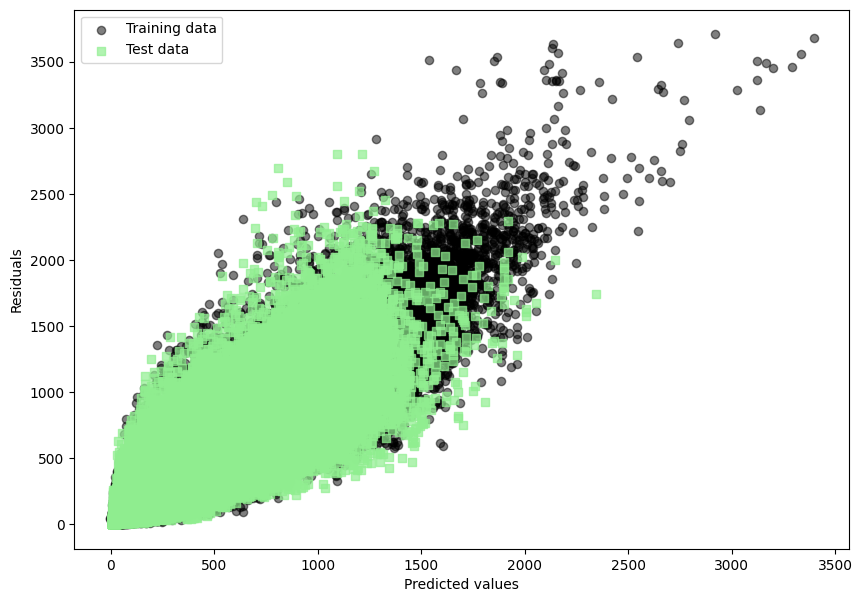

In [35]:
# プロット
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
# plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
# plt.xlim([-10, 50])
plt.show()

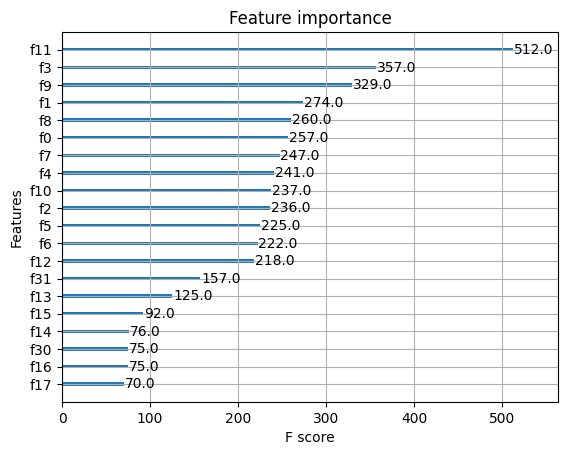

In [38]:
xgb.plot_importance(mod, max_num_features=20);

In [106]:
def show(i: int):
    plt.plot(list(range(-30, 11)), df_solar.iloc[i + int(len(df_solar)*0.7), 11:].values, label='true')
    plt.plot(list(range(1, 11)), y_test_pred[i], label='pred')
    plt.legend();

interact(show, i=(0, len(y_test)-1, 1))

interactive(children=(IntSlider(value=1202897, description='i', max=2405795), Output()), _dom_classes=('widget…

<function __main__.show(i: int)>

# 帯電分類

In [95]:
def undersampling(df):
    df.lat = df.lat.abs()
    df = df[(df.lat > 60) & (df.lat <= 75) & ((df.lon < 6) | (df.lon > 20))]
    df_charge = df[df.charge == 1]
    df_nocharge = df[df.charge == 0].sample(n=len(df_charge))
    df_new = pd.concat([df_charge, df_nocharge])
    df_new = df_new.sort_values(by='date')

    return df_new

def cutTime(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df.date < '2019-04']
    return df

In [96]:
df_solar = pd.read_csv('solar_wind.csv', parse_dates=['date'])

In [97]:
df_charge_f16 = pd.read_csv('dmsp-f16.csv', parse_dates=['date'])
df_charge_f17 = pd.read_csv('dmsp-f17.csv', parse_dates=['date'])
df_charge_f18 = pd.read_csv('dmsp-f18.csv', parse_dates=['date'])

In [98]:
df_charge = pd.concat([df_charge_f16, df_charge_f17, df_charge_f18], axis=0)
df_charge.reset_index(drop=True, inplace=True)
df = pd.merge(df_charge, df_solar, on='date')

In [99]:
df['charge'] = df.charge_count.apply(lambda x: 1 if x > 0 else 0)
# df.charge = df.charge.astype('category')

In [35]:
df_2019_after = df[df.date > '2019-04']
df_2019_after = undersampling(df_2019_after)

df_2019_before = df[df.date <= '2019-04']
df_2019_before = undersampling(df_2019_before)

/tmp/ipykernel_1089562/2874845856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lat = df.lat.abs()
/tmp/ipykernel_1089562/2874845856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lat = df.lat.abs()


In [38]:
# df.drop(['satellite_id', 'date', 'flow_speed', 'charge_count'], axis=1, inplace=True)
df_2019_after.drop(['satellite_id', 'date', 'flow_speed', 'charge_count', 'AE_INDEX', 'AL_INDEX', 'AU_INDEX'], axis=1, inplace=True)
# df.drop(['satellite_id', 'date', 'flow_speed', 'charge_count'], axis=1, inplace=True)
df_2019_before.drop(['satellite_id', 'date', 'flow_speed', 'charge_count', 'AE_INDEX', 'AL_INDEX', 'AU_INDEX'], axis=1, inplace=True)

In [39]:
df_2019_before.reset_index(drop=True, inplace=True)
df_2019_after.reset_index(drop=True, inplace=True)

In [100]:
df_processed = undersampling(df)
df_processed.drop(['satellite_id', 'date', 'flow_speed', 'charge_count', 'AE_INDEX', 'AL_INDEX', 'AU_INDEX'], axis=1, inplace=True)
df_processed.reset_index(drop=True, inplace=True)


In [ ]:
df_processed.drop(['lat', 'lon'], axis=1, inplace=True)

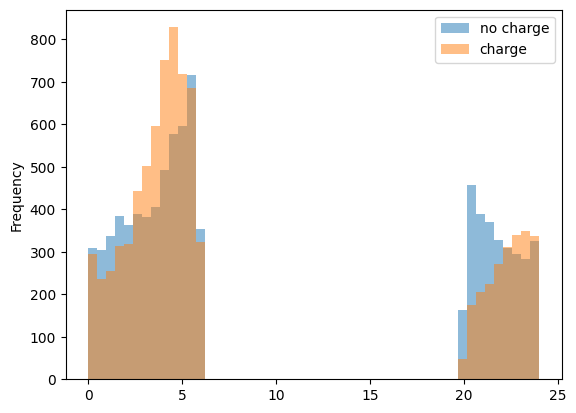

In [101]:
df_processed[df_processed.charge == 0].lon.plot.hist(bins=50, alpha=0.5, label='no charge')
df_processed[df_processed.charge == 1].lon.plot.hist(bins=50, alpha=0.5, label='charge')
plt.legend();

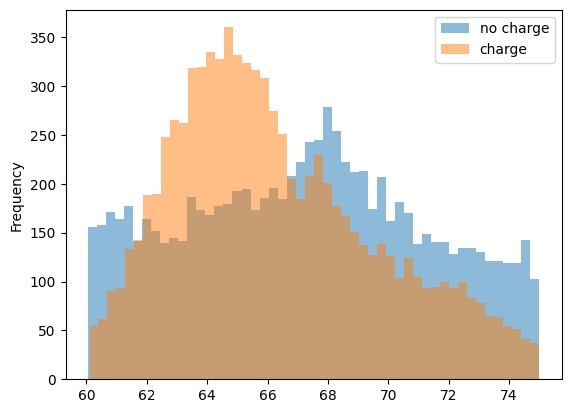

In [103]:
df_processed[df_processed.charge == 0].lat.plot.hist(bins=50, alpha=0.5, label='no charge')
df_processed[df_processed.charge == 1].lat.plot.hist(bins=50, alpha=0.5, label='charge')
plt.legend();

In [104]:
from sklearn.model_selection import train_test_split

# stratifyに設定したデータが均一になるように分割
train, test = train_test_split(df_processed, test_size = 0.2, stratify=df_processed['charge'])

features = [c for c in df_processed.columns if c != "charge"]
print(len(features))

#学習用データ
X_train = train[features]
y_train = train["charge"].values

#検証用データ
X_test = test[features]
y_test = test["charge"].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

13
(13640, 13) (13640,)
(3410, 13) (3410,)


In [40]:
features = [c for c in df_2019_before.columns if c != "charge"]
print(len(features))

#学習用データ
X_train = df_2019_before[features]
y_train = df_2019_before["charge"].values

#検証用データ
X_test = df_2019_after[features]
y_test = df_2019_after["charge"].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

13
(13386, 13) (13386,)
(3664, 13) (3664,)


## パラメータチューニング

In [36]:
from bayes_opt import BayesianOptimization


# データ形式の変換
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

def xgboost_cv(
    learning_rate,
    max_depth,
    subsample,
    colsample_bytree,
    min_child_weight,
    gamma,
    alpha):

    # 履歴保存用の変数
    history = {}
    
    params = {"objective": "binary:logistic"}

    params['learning_rate'] = learning_rate
    # maximum depth of a tree, increase this value will make the model more complex / likely to be overfitting.
    params['max_depth'] = int(max_depth) 
    #  subsample ratio of the training instance. Setting it to 0.5 means that XGBoost randomly collected half of the data instances to grow trees and this will prevent overfitting.
    params['subsample'] = subsample
    # subsample ratio of columns when constructing each tree.
    params['colsample_bytree'] = colsample_bytree 
    # minimum sum of instance weight (hessian) needed in a child. The larger, the more conservative the algorithm will be.
    params['min_child_weight'] = min_child_weight
    # minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
    params['gamma'] = gamma 
    # L1 regularization term on weights, increase this value will make model more conservative. 
    params['alpha'] = alpha 
    params['objective'] = 'binary:logistic'

    # 学習
    model = xgb.train(
        params = params,
        dtrain = dtrain,
        evals = [(dtrain, "train"), (dtest, "test")],
        evals_result = history,
        num_boost_round = 100,
        early_stopping_rounds = 10,
    )

    return 1.0 - history['test']["logloss"][-1]


xgboost_cv_bo = BayesianOptimization(xgboost_cv, 
                             {
                                 'learning_rate': (0.1, 0.9),
                                 'max_depth': (5, 15),
                                 'subsample': (0.5, 1),
                                 'colsample_bytree': (0.1, 1),
                                 'min_child_weight': (1, 20),
                                 'gamma': (0, 10),
                                 'alpha': (0, 10),
                             })

xgboost_cv_bo.maximize(n_iter=50)

|   iter    |  target   |   alpha   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------------------
[0]	train-logloss:0.63896	test-logloss:0.64155
[1]	train-logloss:0.61582	test-logloss:0.62300
[2]	train-logloss:0.58185	test-logloss:0.59186
[3]	train-logloss:0.57186	test-logloss:0.58429
[4]	train-logloss:0.55682	test-logloss:0.57241
[5]	train-logloss:0.54390	test-logloss:0.56065
[6]	train-logloss:0.52992	test-logloss:0.54774
[7]	train-logloss:0.52426	test-logloss:0.54379
[8]	train-logloss:0.51606	test-logloss:0.53920
[9]	train-logloss:0.51072	test-logloss:0.53619
[10]	train-logloss:0.48980	test-logloss:0.51522
[11]	train-logloss:0.47586	test-logloss:0.50223
[12]	train-logloss:0.47185	test-logloss:0.49969
[13]	train-logloss:0.46710	test-logloss:0.49620
[14]	train-logloss:0.46506	test-logloss:0.49408
[15]	train-logloss:0.45782	test-logloss:0.48776
[16]	train-logloss:0.4

In [39]:
xgboost_cv_bo.max['params']

{'alpha': 7.406139811735055,
 'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 13.426067004244208,
 'min_child_weight': 15.267909903356779,
 'subsample': 1.0}

In [105]:
opt_param = {'alpha': 7.406139811735055,
 'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 13.426067004244208,
 'min_child_weight': 15.267909903356779,
 'subsample': 1.0}

In [106]:
# データ形式の変換
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

# パラメータ設定
# binary: 二値分類
params = {
    "objective": "binary:logistic",
    }

for k, v in opt_param.items():
    if k in ['max_depth']:
        params[k] = int(v)
    else:
        params[k] = v

# 履歴保存用の変数
history = {}

# 学習
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dtest, "test")],
    evals_result = history,
    num_boost_round = 300,
    early_stopping_rounds = 10,
)


[0]	train-logloss:0.66000	test-logloss:0.66332
[1]	train-logloss:0.63273	test-logloss:0.63819
[2]	train-logloss:0.60877	test-logloss:0.61634
[3]	train-logloss:0.58837	test-logloss:0.59813
[4]	train-logloss:0.57063	test-logloss:0.58223
[5]	train-logloss:0.55505	test-logloss:0.56851
[6]	train-logloss:0.53988	test-logloss:0.55582
[7]	train-logloss:0.52639	test-logloss:0.54429
[8]	train-logloss:0.51578	test-logloss:0.53489
[9]	train-logloss:0.50512	test-logloss:0.52601
[10]	train-logloss:0.49582	test-logloss:0.51825
[11]	train-logloss:0.48728	test-logloss:0.51125
[12]	train-logloss:0.47905	test-logloss:0.50461
[13]	train-logloss:0.47204	test-logloss:0.49885
[14]	train-logloss:0.46521	test-logloss:0.49377
[15]	train-logloss:0.45894	test-logloss:0.48912
[16]	train-logloss:0.45333	test-logloss:0.48518
[17]	train-logloss:0.44824	test-logloss:0.48142
[18]	train-logloss:0.44329	test-logloss:0.47747
[19]	train-logloss:0.43897	test-logloss:0.47527
[20]	train-logloss:0.43486	test-logloss:0.47272
[2

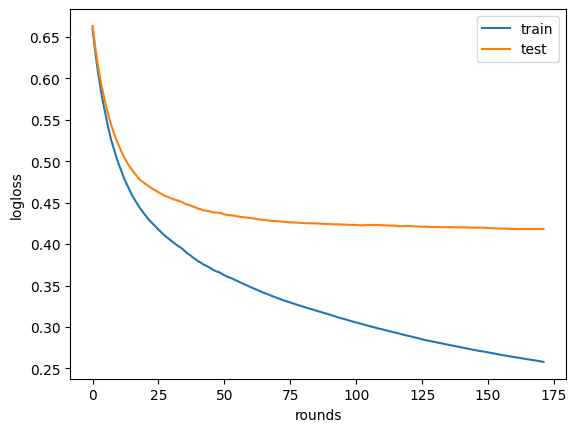

In [112]:
plt.plot(history["train"]["logloss"], label = "train")
plt.plot(history["test"]["logloss"], label = "test")
plt.legend()
plt.xlabel("rounds")
plt.ylabel("logloss")
plt.show()

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, f1_score

# 推論
y_pred = model.predict(dtest)
y_pred_label = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred_label)
# 性能評価
print("正解率: " + str(round(accuracy_score(y_test, y_pred_label),3)))
print("適合率: " + str(round(precision_score(y_test, y_pred_label, average="macro"),3)))
print("再現率: " + str(round(recall_score(y_test, y_pred_label, average="macro"),3)))
print("F1スコア: " + str(round(f1_score(y_test, y_pred_label, average="macro"),3)))
print("AUC: " + str(round(roc_auc_score(y_test, y_pred),3)))

正解率: 0.805
適合率: 0.805
再現率: 0.805
F1スコア: 0.805
AUC: 0.888


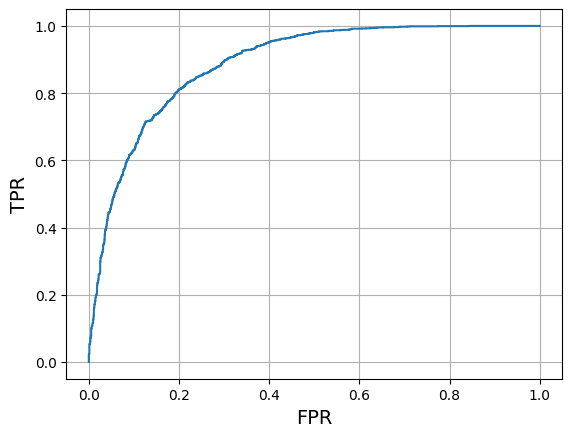

In [114]:
from sklearn.metrics import roc_curve
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.grid();

<AxesSubplot: >

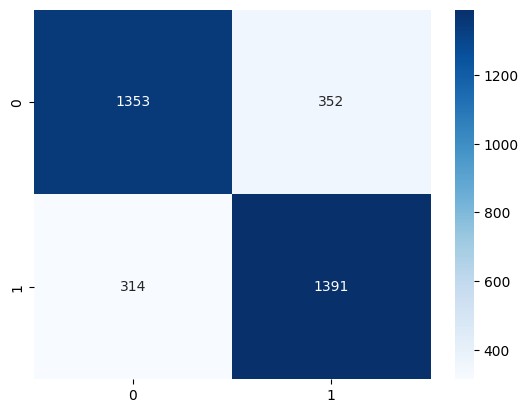

In [115]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

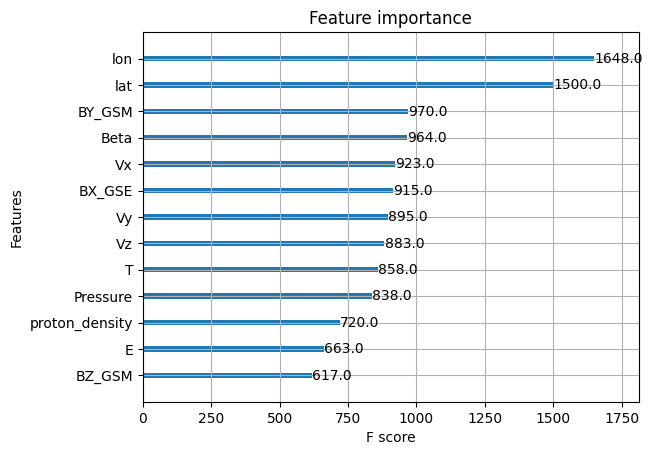

In [116]:
xgb.plot_importance(model);